In [1]:
import pandas as pd
import numpy as np
import os

# Set working dir to project root dir
os.chdir(os.path.abspath(os.path.join(os.getcwd(), "..")))
print(f"Changed working directory to: {os.getcwd()}")

# Set abs path to data
project_root = "/Users/oliulv/Documents/foak"
data_path = os.path.join(project_root, "data", "SHIBUSDT_15m_1h-pump05_210510_250302.csv")

# Load data into df
df = pd.read_csv(data_path, parse_dates=["timestamp"])
df.head()

Changed working directory to: /Users/oliulv/Documents/foak


,timestamp,open,high,low,close,volume,num_trades,taker_buy_base,taker_buy_quote,label,...,volatility_cluster,buy_sell_ratio,bid_ask_spread,depth_imbalance,fractal_dimension,fib_retrace_38,fib_retrace_50,order_flow_imbalance,rolling_kurtosis,lunar_phase
0,2021-05-10 11:00:00,0.000014,0.000050,0.000014,0.000039,5.918828e+12,315448.0,3.342802e+12,1.222508e+08,0,...,NaN,1.297658,0.912513,0.564774,NaN,NaN,NaN,0.129549,NaN,0.344828
1,2021-05-10 11:15:00,0.000039,0.000039,0.000030,0.000030,3.384069e+12,175680.0,1.526327e+12,5.133536e+07,0,...,NaN,0.821604,0.327534,0.451033,NaN,NaN,NaN,-0.097934,NaN,0.344828
2,2021-05-10 11:30:00,0.000030,0.000031,0.000026,0.000030,3.531627e+12,132000.0,1.763596e+12,5.010335e+07,0,...,NaN,0.997492,0.168076,0.499372,NaN,NaN,NaN,-0.001255,NaN,0.344828
3,2021-05-10 11:45:00,0.000030,0.000030,0.000027,0.000030,2.439783e+12,107329.0,1.289438e+12,3.770433e+07,0,...,NaN,1.120914,0.106698,0.528505,NaN,NaN,NaN,0.057010,NaN,0.344828
4,2021-05-10 12:00:00,0.000030,0.000034,0.000029,0.000033,2.393769e+12,116101.0,1.301911e+12,4.010326e+07,0,...,NaN,1.192382,0.152833,0.543875,NaN,NaN,NaN,0.087750,NaN,0.344828


In [2]:
from utils.model.model_manager import ModelManager

# Init manager
symbol = "SHIBUSDT"
start_date = "2021-05-10"
end_date = "2025-03-02"
manager = ModelManager(symbol, start_date, end_date)

# Load data into manager
manager.load_data(data_path)

# Prepare and split data
test_window_days = 30
manager.split_data(test_window_days)

🕵️♂️ Dataset loaded successfully
📊 Data split completed


(            open      high       low     close        volume  num_trades  \
 0       0.000014  0.000050  0.000014  0.000039  5.918828e+12    315448.0   
 1       0.000039  0.000039  0.000030  0.000030  3.384069e+12    175680.0   
 2       0.000030  0.000031  0.000026  0.000030  3.531627e+12    132000.0   
 3       0.000030  0.000030  0.000027  0.000030  2.439783e+12    107329.0   
 4       0.000030  0.000034  0.000029  0.000033  2.393769e+12    116101.0   
 ...          ...       ...       ...       ...           ...         ...   
 130672  0.000019  0.000019  0.000019  0.000019  3.962411e+09      3107.0   
 130673  0.000019  0.000019  0.000019  0.000019  1.613772e+10     12521.0   
 130674  0.000019  0.000019  0.000019  0.000019  6.384974e+09      4615.0   
 130675  0.000019  0.000019  0.000019  0.000019  5.449028e+09      5292.0   
 130676  0.000019  0.000019  0.000019  0.000019  1.031053e+10      4981.0   
 
         taker_buy_base  taker_buy_quote    1m_roc  30m_volatility  ...  \

In [3]:
# Config model with default params
manager.configure_model()

# Fit and evaluate model on data
manager.fit_and_evaluate()

# Tune threshold
manager.tune_threshold(min_recall=0.6, min_precision=0.7)


🏋️ Training model...

🎯 Tuning threshold...
Optimal threshold: 0.6989


np.float64(0.6989347749426945)

In [4]:
# Get and print merics
metrics = manager.get_metrics()
print(metrics)


📊 Model Performance Report
Optimal Threshold: 0.6989
AUC-ROC Score: 0.9749

Overall Metrics:
Accuracy:  0.9236
Precision: 0.9267
Recall:    0.9236
F1-Score:  0.9163

Class 0 Metrics:
Precision: 0.9186
Recall:    0.9949
F1-Score:  0.9552

Class 1 Metrics:
Precision: 0.9632
Recall:    0.6015
F1-Score:  0.7406

Using raw probabilities
Classification threshold: 0.6989
{'accuracy': 0.9236376258243666, 'precision': 0.9266717946744816, 'recall': 0.9236376258243666, 'f1': 0.9163356251598672, 'auc_roc': np.float64(0.9748692136904559), 'optimal_threshold': np.float64(0.6989347749426945), 'precision_0': 0.9185909980430529, 'recall_0': 0.9949130987706656, 'f1_0': 0.9552299552299552, 'precision_1': 0.9631901840490797, 'recall_1': 0.6015325670498084, 'f1_1': 0.7405660377358491}



🎯 Generating SHAP analysis...


/Users/oliulv/Documents/foak/venv/lib/python3.12/site-packages/shap/explainers/_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


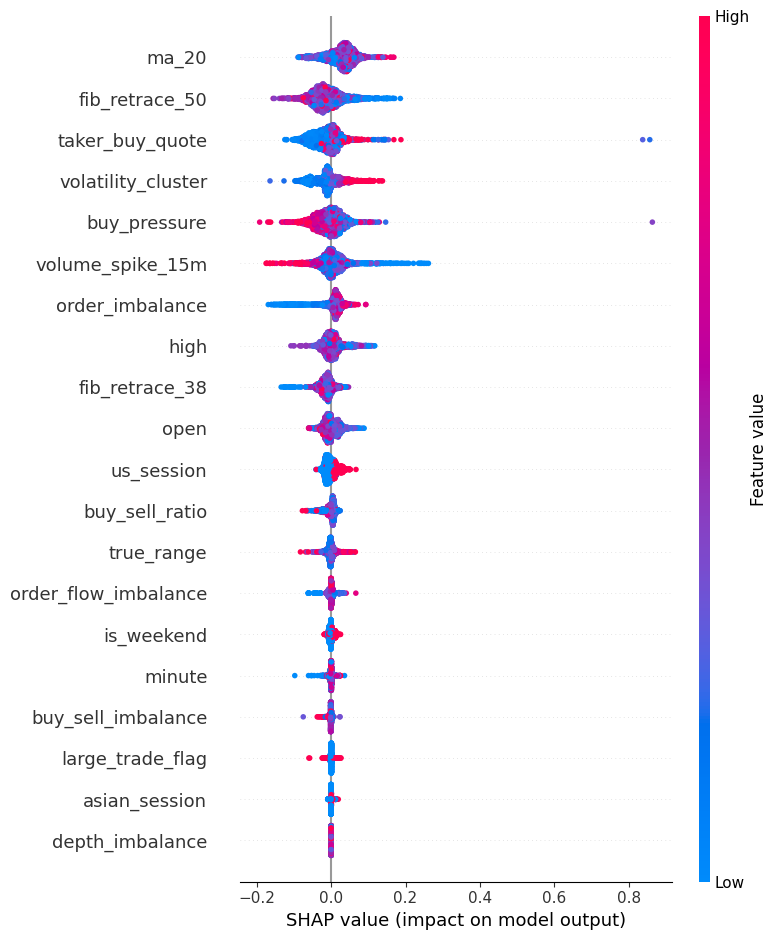


📈 Calculating feature importance...


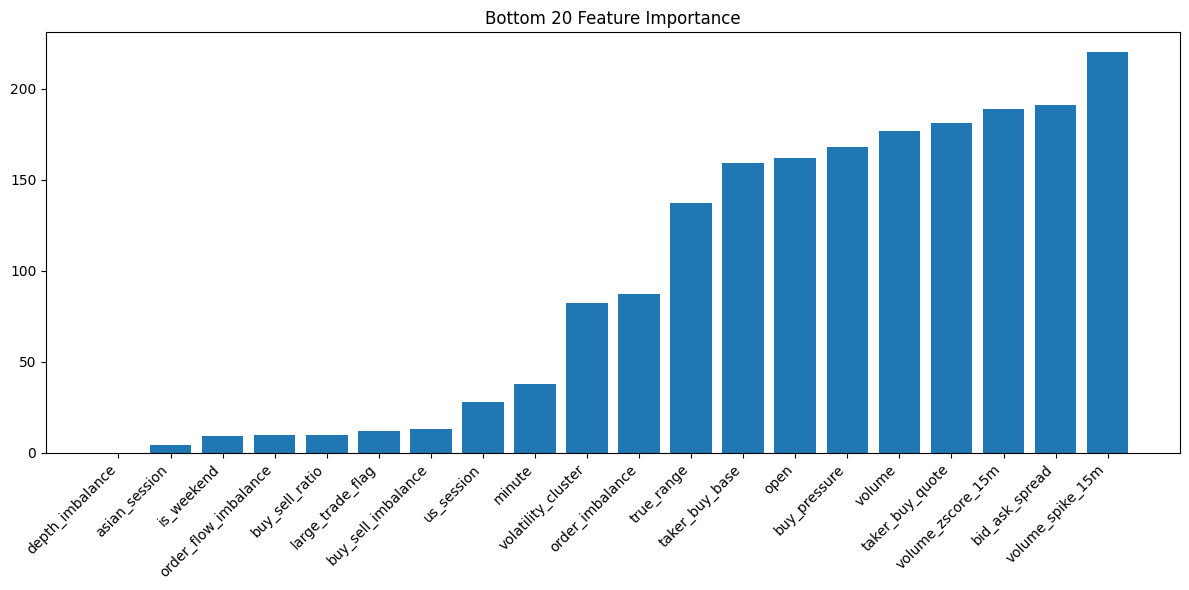

Found existing experiment
Identical result already exists for experiment ID: 20
Logged feature importance for experiment ID: 20


In [5]:
# Get and plot shap analysis
shap_values = manager.shap_analysis(show_bottom=True, n_features=20)

# Get and plot feature analysis
lgbm_values = manager.feature_importance(show_bottom=True, n_features=20)

# Init tracker
from utils.model.experiment_tracker import ExperimentTracker

# Log experiment, results, and feature analysis metrics
with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="15m",
        target_variable="1h-pump05",
        hyperparameters=manager.model.get_params(),
        features=manager.X_train.columns.tolist()
    )

    # Log experiment results
    results = tracker.log_results(experiment, metrics, test_window_days)

    # Log feature analysis metrics
    tracker.log_feature_importance(experiment, results, shap_values, lgbm_values)

In [ ]:
from utils.model.walk_forward import WalkForwardAnalyzer

# Store org params for logging
org_params = manager.model.get_params()

# Init wf
wf = WalkForwardAnalyzer(
    0.3,
    0.07,
    manager.optimal_threshold)

# Config model for wf
manager.configure_walk_forward_model()

# Prepare featuers
X = manager.df.drop(columns=["label"])
y = manager.df["label"]

# wf val
predictions, true_labels, metrics_history = wf.validate(
    manager.model,
    X,
    y)

In [ ]:
from utils.model.experiment_tracker import ExperimentTracker

# Initialize tracker

with ExperimentTracker() as tracker:

    # Log experiment details
    experiment = tracker.get_or_create_experiment(
        symbol=symbol,
        frequency="15m",
        target_variable="1h-pump05",
        hyperparameters=org_params,
        features=manager.X_train.columns.tolist()
    )

    # Log results
    tracker.log_results(experiment, metrics, test_window_days)

    # Log wf val results
    tracker.log_walk_forward_results(experiment, metrics_history, 0.3, 0.07)

In [ ]:
wf.plot_metrics_over_time()